# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [1]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import copy
import math
from collections import OrderedDict
import IPython.display
from dask.distributed import Client

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [2]:
session = cc.database.create_session()

In [3]:
data = copy.deepcopy(exptdata.exptdict)  # to store fields under the same keys as exptdata.exptdict

In [4]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [5]:
# Add as many as you like, but they must be zonal or meridional
data['1deg_c1']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.0, -201.0, -27.31, -27.31])])
data['025deg_c1']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.3, -204.7, -27.31, -27.31])])
data['01deg_c1']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.3, -204.7, -27.31, -27.31])])

data['1deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.0, -201.0, -27.31, -27.31])])
data['025deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.3, -204.7, -27.31, -27.31])])
data['01deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.3, -204.7, -27.31, -27.31])])

data['1deg_c3']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.0, -201.0, -27.31, -27.31])])
data['025deg_c3']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.3, -204.7, -27.31, -27.31])])
data['01deg_c3']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('East Australian Current', [-206.3, -204.7, -27.31, -27.31])])

### load data

In [6]:
tstart = pd.to_datetime('2012/04/01')
tend = pd.to_datetime('2019/01/01')

In [33]:
tstart = pd.to_datetime('1958/01/01')
tend = pd.to_datetime('2019/01/01')

In [34]:
#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    
# full depth transport
    e['tx_trans_int_z'] = cc.querying.getvar(e['expt'],'tx_trans_int_z', session,
                                             frequency = '1 monthly',
                                             start_time='1958-01-01 00:00:00', 
                                             end_time='2018-12-31 00:00:00')
    e['ty_trans_int_z'] =  e['ty_trans'].sum('st_ocean')
                

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3


In [7]:
#load velocity data 
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]

    if (i+1)%3 != 0:
        e['u'] = cc.querying.getvar(e['expt'],'u', session,
                                    frequency = '1 monthly',
                                    start_time = str(tstart.year),
                                    end_time = str(tend.year)).sel(time=slice(tstart,tend))
        e['v'] = cc.querying.getvar(e['expt'],'v', session,
                                    frequency = '1 monthly',
                                    start_time = str(tstart.year),
                                    end_time = str(tend.year)).sel(time=slice(tstart,tend))
    else:
        e['u'] = cc.querying.getvar(e['expt'],'u', session,
                                ncfile='ocean-3d-u-1-monthly-mean-ym_%.nc',
                                start_time = str(tstart.year),
                                end_time = str(tend.year)).sel(time=slice(tstart,tend))
        e['v'] = cc.querying.getvar(e['expt'],'v', session,
                                ncfile='ocean-3d-v-1-monthly-mean-ym_%.nc',
                                start_time = str(tstart.year),
                                end_time = str(tend.year)).sel(time=slice(tstart,tend))

    e['u^2'] = (e['u'])**2
    e['v^2'] = (e['v'])**2  

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3


### map

1deg_c1
East Australian Current


KeyError: 'ty_trans_int_z'

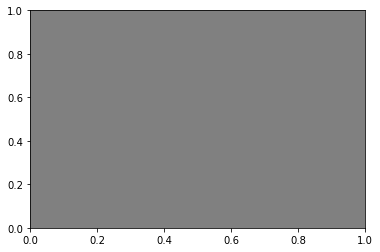

In [8]:
# plot maps of transect locations (just final time shown)
m = 1.5 # margin (degrees)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        print(strait)
        fig, ax = plt.subplots(nrows=1, ncols=1)
        ax.set_facecolor('gray')  # gray land points
        if xmin == xmax:
            e['tx_trans_int_z'].isel(time=-1)\
                                .sel(xu_ocean=slice(xmin-m, xmax+m))\
                                .sel(yt_ocean=slice(ymin-m, ymax+m))\
                                .plot()

        elif ymin == ymax:
            e['ty_trans_int_z'].isel(time=-1)\
                                .sel(xt_ocean=slice(xmin-m, xmax+m))\
                                .sel(yu_ocean=slice(ymin-m, ymax+m))\
                                .plot()
        else:
            raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        plt.plot([xmin, xmax], [ymin, ymax],
                color='green', linewidth=4, alpha=0.7)
        plt.title(strait+', '+e['desc'])

In [10]:
# # plot vertical slices at transect locations
# m = 1.5 # margin (degrees)
# for ekey in data.keys():
#     print(ekey)
#     e = data[ekey]
#     for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
#         print(strait)
#         fig, ax = plt.subplots(nrows=1, ncols=1)
#         ax.set_facecolor('gray')  # gray land points
#         if xmin == xmax:
#             e['tx_trans'].isel(time=-1)\
#                                 .sel(xu_ocean=xmin, method='nearest')\
#                                 .sel(yt_ocean=slice(ymin-m, ymax+m))\
#                                 .plot()
#             plt.plot([ymin, ymin, ymax, ymax], [0, 5000, 5000, 0],
#                 color='green', linewidth=4, alpha=0.7)
#         elif ymin == ymax:
#             e['ty_trans'].isel(time=-1)\
#                                 .sel(xt_ocean=slice(xmin-m, xmax+m))\
#                                 .sel(yu_ocean=ymin, method='nearest')\
#                                 .plot()
#             plt.plot([xmin, xmin, xmax, xmax], [0, 5000, 5000, 0],
#                 color='green', linewidth=4, alpha=0.7)
#         else:
#             raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
#         plt.title(strait+', '+e['desc'])
#         plt.gca().invert_yaxis()

In [11]:
# # plot maps of transect locations (just final time shown)
# m = 1.5 # margin (degrees)
# for ekey in data.keys():
#     print(ekey)
#     e = data[ekey]
#     for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
#         print(strait)
#         fig, ax = plt.subplots(nrows=1, ncols=1)
#         ax.set_facecolor('gray')  # gray land points
#         if xmin == xmax:
#             e['u'].isel(time=-1).sel(st_ocean=0, method = 'nearest')\
#                                 .sel(xu_ocean=slice(xmin-m, xmax+m))\
#                                 .sel(yu_ocean=slice(ymin-m, ymax+m))\
#                                 .plot()

#         elif ymin == ymax:
#             e['v'].isel(time=-1).sel(st_ocean=0, method = 'nearest')\
#                                 .sel(xu_ocean=slice(xmin-m, xmax+m))\
#                                 .sel(yu_ocean=slice(ymin-m, ymax+m))\
#                                 .plot()
#         else:
#             raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
#         plt.plot([xmin, xmax], [ymin, ymax],
#                 color='green', linewidth=4, alpha=0.7)
#         plt.title(strait+', '+e['desc'])

## vertical slice

### observation

In [7]:
ds = xr.open_dataset('/g/data/v45/aek156/IMOS_EAC/EAC_filled-daily-distance-depth-gridded-product_20120401-20210529.nc')

ds['v'] = ds.VCUR.sel(TIME=slice(tstart,tend))
ds['v^2'] = (ds['v'])**2

section = {'East Australian Current': [153.6, 155.3, -27.31, -27.31]}

East Australian Current


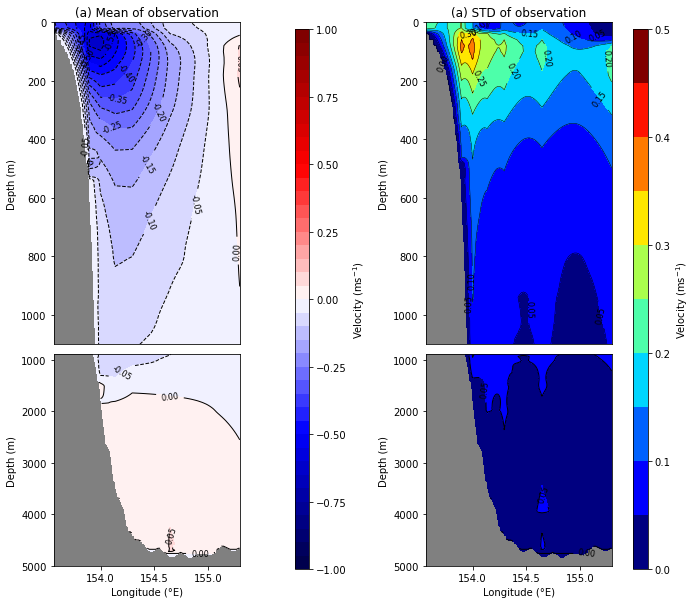

In [12]:
# plot vertical slices at transect locations
fig,ax = plt.subplots(2,2,figsize=(10,10))
grid = plt.GridSpec(5, 2, wspace=1, hspace= 0.1)

clevelsU = np.arange(-1,1.01,0.05)
clevelsSTD = np.arange(0,0.51,0.05)

m = 0 # margin (degrees)
n = 1


for strait, (xmin, xmax, ymin, ymax) in section.items():
    print(strait)

    ax1 = plt.subplot(grid[0:3,0])
    ax1.set_facecolor('gray')  # gray land points

    velocity = ds['v'].mean('TIME')\
                     .sel(LONGITUDE=slice(xmin-n, xmax+m))\
                     .sel(DEPTH = slice(0,1100))

    p1 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)
    
    # velocity.plot.contour(colors='k',levels=clevelsU,linewidths=1)
    xv, yv = np.meshgrid(velocity.LONGITUDE,velocity.DEPTH)
    p2=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)

    plt.clabel(p2, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('Depth (m)')
    plt.xticks([])
    plt.yticks([0,200,400,600,800,1000])
    plt.title('(a) Mean of observation')
    plt.gca().invert_yaxis()

    

    ax2 = plt.subplot(grid[0:3,1])
    ax2.set_facecolor('gray')  # gray land points

    velocity_sq = ds['v^2'].mean('TIME')\
                          .sel(LONGITUDE=slice(xmin-n, xmax+m))\
                          .sel(DEPTH = slice(0,1100))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p3 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.LONGITUDE,STD.DEPTH)
    p4=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=0.5)

    plt.clabel(p4, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('Depth (m)')
    plt.xticks([])
    plt.yticks([0,200,400,600,800,1000])
    plt.title('(a) STD of observation')
    plt.gca().invert_yaxis()




    ax3 = plt.subplot(grid[3:5,0])
    ax3.set_facecolor('gray')  # gray land points

    velocity = ds['v'].mean('TIME')\
                     .sel(LONGITUDE=slice(xmin-n, xmax+m))\
                     .sel(DEPTH = slice(900,5000))

    p5 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.LONGITUDE,velocity.DEPTH)
    p6=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)
    
    plt.clabel(p6, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Depth (m)')
    index_ls = [154,154.5,155]
    plt.xticks(index_ls)
    plt.yticks([1000,2000,3000,4000,5000])
    plt.title('')
    plt.gca().invert_yaxis()

    ax5 = plt.axes([0.46,0.12,0.02,0.75])
    cb = plt.colorbar(p1, ax = [ax1,ax3], cax = ax5, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



    ax4 = plt.subplot(grid[3:5,1])
    ax4.set_facecolor('gray')  # gray land points

    velocity_sq = ds['v^2'].mean('TIME')\
                          .sel(LONGITUDE=slice(xmin-n, xmax+m))\
                          .sel(DEPTH = slice(900,5000))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p7 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.LONGITUDE,STD.DEPTH)
    p8=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p8, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Depth (m)')
    index_ls = [154,154.5,155]
    plt.xticks(index_ls)
    plt.yticks([1000,2000,3000,4000,5000])
    plt.title('')
    plt.gca().invert_yaxis()

    
    ax6 = plt.axes([0.93,0.12,0.02,0.75])
    cb = plt.colorbar(p3, ax = [ax2,ax4], cax=ax6, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')




savefigure('1')

### model

East Australian Current


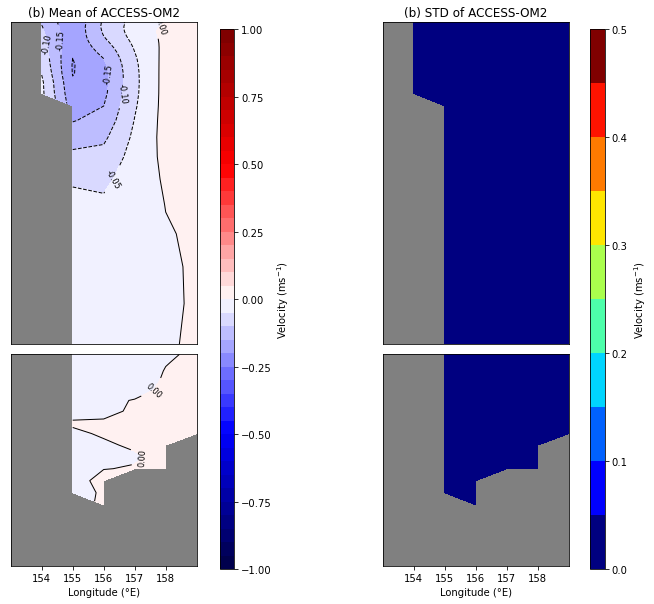

In [23]:
# plot vertical slices at transect locations
fig,ax = plt.subplots(2,2,figsize=(10,10))
grid = plt.GridSpec(5, 2, wspace=1, hspace= 0.1)

clevelsU = np.arange(-1,1.01,0.05)
clevelsSTD = np.arange(0,0.51,0.05)

m = 0 # margin (degrees)
n = 1


e = data['1deg_c2']

for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
    print(strait)

    ax1 = plt.subplot(grid[0:3,0])
    ax1.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(0,1100))

    p1 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p2=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)

    plt.clabel(p2, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    # plt.ylabel('Depth (m)')
    plt.ylabel('')
    plt.xticks([])
    # plt.yticks([0,200,400,600,800,1000])
    plt.yticks([])
    plt.title('(b) Mean of '+ e['desc'])
    plt.gca().invert_yaxis()

    

    ax2 = plt.subplot(grid[0:3,1])
    ax2.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(0,1100))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p3 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p4=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p4, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.title('(b) STD of '+e['desc'])
    plt.gca().invert_yaxis()




    ax3 = plt.subplot(grid[3:5,0])
    ax3.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(900,5000))

    p5 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p6=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)
    
    plt.clabel(p6, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    # plt.ylabel('Depth (m)')
    plt.ylabel('')
    scale_ls = [-206,-205,-204,-203,-202]
    index_ls = [154,155,156,157,158]
    plt.xticks(scale_ls,index_ls)
    # plt.yticks([1000,2000,3000,4000,5000])
    plt.yticks([])
    plt.title('')
    plt.gca().invert_yaxis()

    ax5 = plt.axes([0.415,0.12,0.02,0.75])
    cb = plt.colorbar(p1, ax = [ax1,ax3], cax = ax5, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



    ax4 = plt.subplot(grid[3:5,1])
    ax4.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(900,5000))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p7 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p8=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p8, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('')
    scale_ls = [-206,-205,-204,-203,-202]
    index_ls = [154,155,156,157,158]
    plt.xticks(scale_ls,index_ls)
    plt.yticks([])
    plt.title('')
    plt.gca().invert_yaxis()

    
    ax6 = plt.axes([0.93,0.12,0.02,0.75])
    cb = plt.colorbar(p3, ax = [ax2,ax4], cax=ax6, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



savefigure('2')

East Australian Current


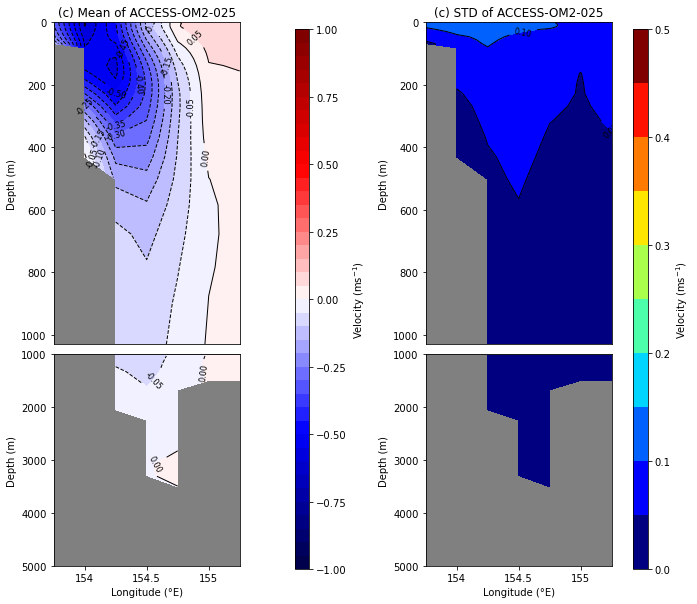

In [18]:
# plot vertical slices at transect locations
fig,ax = plt.subplots(2,2,figsize=(10,10))
grid = plt.GridSpec(5, 2, wspace=1, hspace= 0.1)

clevelsU = np.arange(-1,1.01,0.05)
clevelsSTD = np.arange(0,0.51,0.05)

m = 0 # margin (degrees)
n = 0


e = data['025deg_c2']

for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
    print(strait)

    ax1 = plt.subplot(grid[0:3,0])
    ax1.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(0,1100))

    p1 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p2=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)

    plt.clabel(p2, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('Depth (m)')
    plt.xticks([])
    plt.yticks([0,200,400,600,800,1000])
    plt.title('(c) Mean of '+ e['desc'])
    plt.gca().invert_yaxis()

    

    ax2 = plt.subplot(grid[0:3,1])
    ax2.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(0,1100))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p3 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p4=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p4, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('Depth (m)')
    plt.xticks([])
    plt.yticks([0,200,400,600,800,1000])
    plt.title('(c) STD of '+e['desc'])
    plt.gca().invert_yaxis()




    ax3 = plt.subplot(grid[3:5,0])
    ax3.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(900,5000))

    p5 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p6=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)
    
    plt.clabel(p6, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Depth (m)')
    scale_ls = [-206,-205.5,-205]
    index_ls = [154,154.5,155]
    plt.xticks(scale_ls,index_ls)
    plt.yticks([1000,2000,3000,4000,5000])
    plt.title('')
    plt.gca().invert_yaxis()

    ax5 = plt.axes([0.46,0.12,0.02,0.75])
    cb = plt.colorbar(p1, ax = [ax1,ax3], cax = ax5, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



    ax4 = plt.subplot(grid[3:5,1])
    ax4.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(900,5000))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p7 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p8=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p8, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Depth (m)')
    scale_ls = [-206,-205.5,-205]
    index_ls = [154,154.5,155]
    plt.xticks(scale_ls,index_ls)
    plt.yticks([1000,2000,3000,4000,5000])
    plt.title('')
    plt.gca().invert_yaxis()

    
    ax6 = plt.axes([0.93,0.12,0.02,0.75])
    cb = plt.colorbar(p3, ax = [ax2,ax4], cax=ax6, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



savefigure('Vertical slice of velocity_025deg_cycle2')

East Australian Current


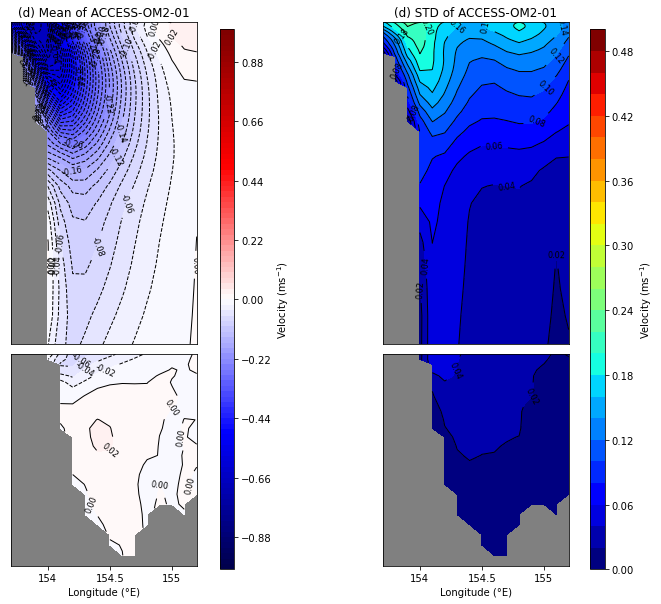

In [10]:
# plot vertical slices at transect locations
fig,ax = plt.subplots(2,2,figsize=(10,10))
grid = plt.GridSpec(5, 2, wspace=1, hspace= 0.1)

clevelsU = np.arange(-1,1.01,0.02)
clevelsSTD = np.arange(0,0.51,0.02)

m = 0 # margin (degrees)
n = 0


e = data['01deg_c2']

for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
    print(strait)

    ax1 = plt.subplot(grid[0:3,0])
    ax1.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(0,1100))

    p1 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p2=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)

    plt.clabel(p2, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.title('(d) Mean of '+ e['desc'])
    plt.gca().invert_yaxis()

    

    ax2 = plt.subplot(grid[0:3,1])
    ax2.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(0,1100))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p3 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p4=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p4, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.title('(d) STD of '+e['desc'])
    plt.gca().invert_yaxis()




    ax3 = plt.subplot(grid[3:5,0])
    ax3.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(900,5000))

    p5 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p6=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)
    
    plt.clabel(p6, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('')
    scale_ls = [-206,-205.5,-205]
    index_ls = [154,154.5,155]
    plt.xticks(scale_ls,index_ls)
    plt.yticks([])
    plt.title('')
    plt.gca().invert_yaxis()

    ax5 = plt.axes([0.415,0.12,0.02,0.75])
    cb = plt.colorbar(p1, ax = [ax1,ax3], cax = ax5, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



    ax4 = plt.subplot(grid[3:5,1])
    ax4.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(900,5000))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p7 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p8=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p8, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('Longitude (°E)')
    plt.ylabel('')
    scale_ls = [-206,-205.5,-205]
    index_ls = [154,154.5,155]
    plt.xticks(scale_ls,index_ls)
    plt.yticks([])
    plt.title('')
    plt.gca().invert_yaxis()

    
    ax6 = plt.axes([0.93,0.12,0.02,0.75])
    cb = plt.colorbar(p3, ax = [ax2,ax4], cax=ax6, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



savefigure('4')

#### 放大

East Australian Current


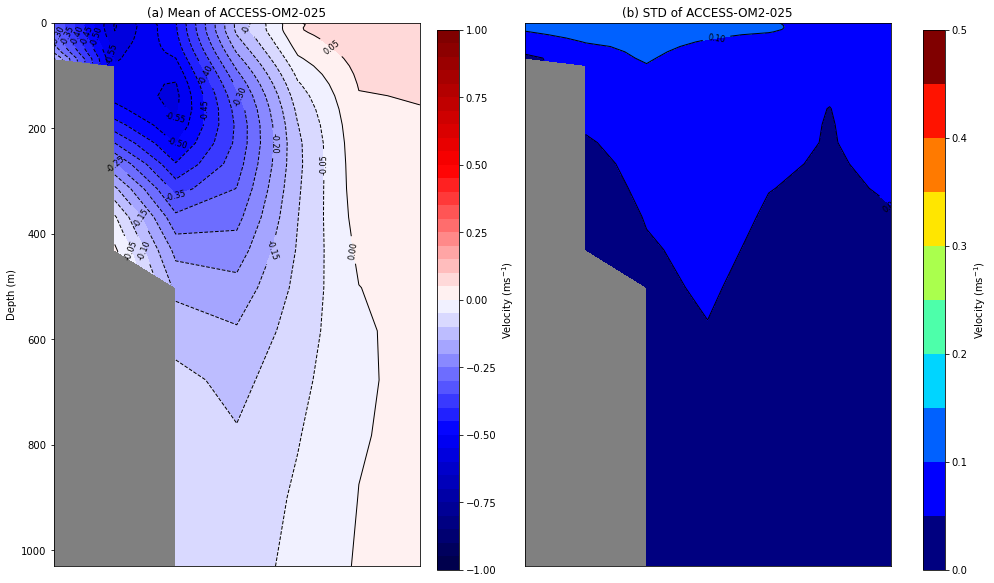

In [9]:
# plot vertical slices at transect locations
fig,ax = plt.subplots(2,2,figsize=(15,10))
grid = plt.GridSpec(5, 6, wspace=2, hspace= 0.1)

clevelsU = np.arange(-1,1.01,0.05)
clevelsSTD = np.arange(0,0.51,0.05)

m = 0 # margin (degrees)
n = 0


e = data['025deg_c2']

for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
    print(strait)

    ax1 = plt.subplot(grid[0:5,0:3])
    ax1.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(0,1100))

    p1 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p2=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)

    plt.clabel(p2, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('Depth (m)')
    plt.xticks([])
    plt.yticks([0,200,400,600,800,1000])
    plt.title('(a) Mean of '+ e['desc'])
    plt.gca().invert_yaxis()

    

    ax2 = plt.subplot(grid[0:5,3:6])
    ax2.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(0,1100))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p3 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p4=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p4, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.title('(b) STD of '+e['desc'])
    plt.gca().invert_yaxis()




#     ax3 = plt.subplot(grid[3:5,0])
#     ax3.set_facecolor('gray')  # gray land points

#     velocity = e['v'].mean('time')\
#                      .sel(xu_ocean=slice(xmin-n, xmax+m))\
#                      .sel(yu_ocean=ymin, method='nearest')\
#                      .sel(st_ocean = slice(900,5000))

#     p5 = velocity.plot.contourf(cmap='seismic', 
#                                 levels=clevelsU,
#                                 add_colorbar=False)

#     xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
#     p6=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)
    
#     plt.clabel(p6, fmt='%3.2f', colors='black', fontsize=8)
#     plt.xlabel('Longitude (°E)')
#     plt.ylabel('Depth (m)')
#     scale_ls = [-206,-205.5,-205]
#     index_ls = [154,154.5,155]
#     plt.xticks(scale_ls,index_ls)
#     plt.yticks([1000,2000,3000,4000,5000])
#     plt.title('')
#     plt.gca().invert_yaxis()

    ax5 = plt.axes([0.48,0.12,0.02,0.75])
    cb = plt.colorbar(p1, ax = ax1, cax = ax5, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



#     ax4 = plt.subplot(grid[3:5,1])
#     ax4.set_facecolor('gray')  # gray land points

#     velocity_sq = e['v^2'].mean('time')\
#                           .sel(xu_ocean=slice(xmin-n, xmax+m))\
#                           .sel(yu_ocean=ymin, method='nearest')\
#                           .sel(st_ocean = slice(900,5000))


#     STD = (velocity_sq - velocity**(2.0))**(0.5)
#     p7 = STD.plot.contourf(cmap='jet', 
#                   levels=clevelsSTD,
#                   add_colorbar=False)

#     xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
#     p8=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

#     plt.clabel(p8, fmt='%3.2f', colors='black', fontsize=8)
#     plt.xlabel('Longitude (°E)')
#     plt.ylabel('')
#     scale_ls = [-206,-205.5,-205]
#     index_ls = [154,154.5,155]
#     plt.xticks(scale_ls,index_ls)
#     plt.yticks([])
#     plt.title('')
#     plt.gca().invert_yaxis()

    
    ax6 = plt.axes([0.93,0.12,0.02,0.75])
    cb = plt.colorbar(p3, ax = ax2, cax=ax6, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



savefigure('Vertical slice of velocity_025deg_cycle2')

East Australian Current


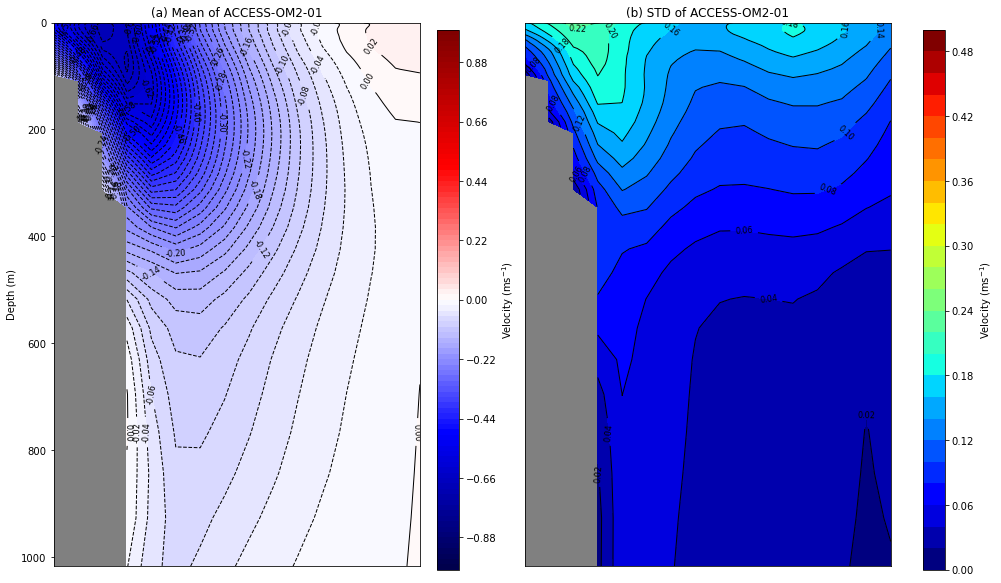

In [10]:
# plot vertical slices at transect locations
fig,ax = plt.subplots(2,2,figsize=(15,10))
grid = plt.GridSpec(5, 6, wspace=2, hspace= 0.1)

clevelsU = np.arange(-1,1.01,0.02)
clevelsSTD = np.arange(0,0.51,0.02)

m = 0 # margin (degrees)
n = 0


e = data['01deg_c2']

for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
    print(strait)

    ax1 = plt.subplot(grid[0:5,0:3])
    ax1.set_facecolor('gray')  # gray land points

    velocity = e['v'].mean('time')\
                     .sel(xu_ocean=slice(xmin-n, xmax+m))\
                     .sel(yu_ocean=ymin, method='nearest')\
                     .sel(st_ocean = slice(0,1100))

    p1 = velocity.plot.contourf(cmap='seismic', 
                                levels=clevelsU,
                                add_colorbar=False)

    xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
    p2=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)

    plt.clabel(p2, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('Depth (m)')
    plt.xticks([])
    plt.yticks([0,200,400,600,800,1000])
    plt.title('(a) Mean of '+ e['desc'])
    plt.gca().invert_yaxis()

    

    ax2 = plt.subplot(grid[0:5,3:6])
    ax2.set_facecolor('gray')  # gray land points

    velocity_sq = e['v^2'].mean('time')\
                          .sel(xu_ocean=slice(xmin-n, xmax+m))\
                          .sel(yu_ocean=ymin, method='nearest')\
                          .sel(st_ocean = slice(0,1100))


    STD = (velocity_sq - velocity**(2.0))**(0.5)
    p3 = STD.plot.contourf(cmap='jet', 
                  levels=clevelsSTD,
                  add_colorbar=False)

    xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
    p4=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

    plt.clabel(p4, fmt='%3.2f', colors='black', fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.title('(b) STD of '+e['desc'])
    plt.gca().invert_yaxis()




#     ax3 = plt.subplot(grid[3:5,0])
#     ax3.set_facecolor('gray')  # gray land points

#     velocity = e['v'].mean('time')\
#                      .sel(xu_ocean=slice(xmin-n, xmax+m))\
#                      .sel(yu_ocean=ymin, method='nearest')\
#                      .sel(st_ocean = slice(900,5000))

#     p5 = velocity.plot.contourf(cmap='seismic', 
#                                 levels=clevelsU,
#                                 add_colorbar=False)

#     xv, yv = np.meshgrid(velocity.xu_ocean,velocity.st_ocean)
#     p6=plt.contour(xv,yv,velocity,colors='k',levels=clevelsU,linewidths=1)
    
#     plt.clabel(p6, fmt='%3.2f', colors='black', fontsize=8)
#     plt.xlabel('Longitude (°E)')
#     plt.ylabel('Depth (m)')
#     scale_ls = [-206,-205.5,-205]
#     index_ls = [154,154.5,155]
#     plt.xticks(scale_ls,index_ls)
#     plt.yticks([1000,2000,3000,4000,5000])
#     plt.title('')
#     plt.gca().invert_yaxis()

    ax5 = plt.axes([0.48,0.12,0.02,0.75])
    cb = plt.colorbar(p1, ax = ax1, cax = ax5, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



#     ax4 = plt.subplot(grid[3:5,1])
#     ax4.set_facecolor('gray')  # gray land points

#     velocity_sq = e['v^2'].mean('time')\
#                           .sel(xu_ocean=slice(xmin-n, xmax+m))\
#                           .sel(yu_ocean=ymin, method='nearest')\
#                           .sel(st_ocean = slice(900,5000))


#     STD = (velocity_sq - velocity**(2.0))**(0.5)
#     p7 = STD.plot.contourf(cmap='jet', 
#                   levels=clevelsSTD,
#                   add_colorbar=False)

#     xv, yv = np.meshgrid(STD.xu_ocean,STD.st_ocean)
#     p8=plt.contour(xv,yv,STD,colors='k',levels=clevelsSTD,linewidths=1)

#     plt.clabel(p8, fmt='%3.2f', colors='black', fontsize=8)
#     plt.xlabel('Longitude (°E)')
#     plt.ylabel('')
#     scale_ls = [-206,-205.5,-205]
#     index_ls = [154,154.5,155]
#     plt.xticks(scale_ls,index_ls)
#     plt.yticks([])
#     plt.title('')
#     plt.gca().invert_yaxis()

    
    ax6 = plt.axes([0.93,0.12,0.02,0.75])
    cb = plt.colorbar(p3, ax = ax2, cax=ax6, orientation='vertical')
    cb.ax.set_ylabel('Velocity (ms$^{-1}$)')



savefigure('Vertical slice of velocity_01deg_cycle2')

## Timeseries

In [35]:
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')

1deg_c1
East Australian Current -21.74635193822394 Sv
025deg_c1
East Australian Current -18.407665173745176 Sv
01deg_c1
East Australian Current -17.39473742084942 Sv
1deg_c2
East Australian Current -22.051248926640927 Sv
025deg_c2
East Australian Current -18.462666625482626 Sv
01deg_c2
East Australian Current -16.644341127413128 Sv
1deg_c3
East Australian Current -20.66656172972973 Sv
025deg_c3
East Australian Current -17.248040525096524 Sv
01deg_c3
East Australian Current -16.907728555984555 Sv


## Transport

In [13]:
trans_obs = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_with gap.nc')

In [14]:
tstart1 = pd.to_datetime('2012/04/01')
tend1 = pd.to_datetime('2013/09/01')
tstart2 = pd.to_datetime('2015/05/01')
tend2 = pd.to_datetime('2019/01/01')

In [10]:
c = ['r', 'b' , 'g', 'r', 'b' , 'g']

In [20]:
def Strait_Transport_2000(St,tmin,tmax):
    
    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()): 
        if 3 <= i and i <= 5:          
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean_0-2000m'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], linewidth=2, color = c[i])
            
    trans_obs.sel(TIME=slice(tstart1,tend1)).plot(color = 'orange',label='IMOS')
    trans_obs.sel(TIME=slice(tstart2,tend2)).plot(color = 'orange')
    ax.legend(loc = 1)
    ax.set_ylim([tmin, tmax])
    ax.set_xlim([pd.datetime(2012,4,1),pd.datetime(2019,1,1)])
    ax.set_title(str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'0-2000m_transport_'+ 'cycle2')       # set cycle

1deg_c2
025deg_c2
01deg_c2


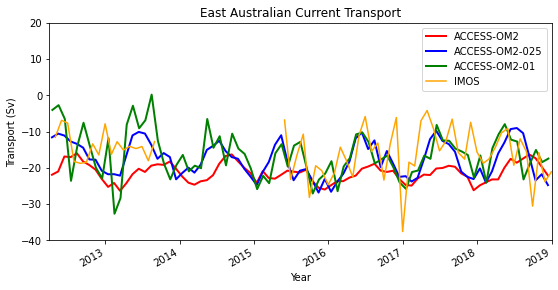

In [21]:
Strait_Transport_2000('East Australian Current',-40,20)

## Seasonal cycle

### with observation

In [12]:
trans_obs = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_without gap.nc')
trans_obs1 = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_1.nc')
trans_obs2 = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_2.nc')
trans_obs3 = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_3.nc')
trans_obs4 = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_4.nc')
trans_obs5 = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_5.nc')
trans_obs6 = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_6.nc')

In [13]:
a = trans_obs.groupby('TIME.month').mean('TIME')
a1 = trans_obs1.groupby('TIME.month').mean('TIME')
a2 = trans_obs2.groupby('TIME.month').mean('TIME')
a3 = trans_obs3.groupby('TIME.month').mean('TIME')
a4 = trans_obs4.groupby('TIME.month').mean('TIME')
a5 = trans_obs5.groupby('TIME.month').mean('TIME')
a6 = trans_obs6.groupby('TIME.month').mean('TIME')

In [24]:
tstart1 = pd.to_datetime('2012/04/01')
tend1 = pd.to_datetime('2013/09/01')
tstart2 = pd.to_datetime('2015/04/01')
tend2 = pd.to_datetime('2019/01/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans1'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                        start_time = str(tstart1),
                                        end_time = str(tend1)).sel(time=slice(tstart1,tend1))
    e['ty_trans1'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                        start_time = str(tstart1),
                                        end_time = str(tend1)).sel(time=slice(tstart1,tend1))
    
    e['tx_trans2'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                       start_time = str(tstart2),
                                       end_time = str(tend2)).sel(time=slice(tstart2,tend2))
    e['ty_trans2'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time = str(tstart2),
                                       end_time = str(tend2)).sel(time=slice(tstart2,tend2))
    
    e['tx_trans'] = e['tx_trans1'].combine_first(e['tx_trans2'])
    e['ty_trans'] = e['ty_trans1'].combine_first(e['ty_trans2'])
        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')

            
A1 = (data['1deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A2 = (data['025deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A3 = (data['01deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A4 = (data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A5 = (data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A6 = (data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A7 = (data['1deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A8 = (data['025deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A9 = (data['01deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A = [A1,A2,A3,A4,A5,A6,A7,A8,A9]

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -23.1729835984556 Sv
025deg_c1
East Australian Current -19.20240976061776 Sv
01deg_c1
East Australian Current -17.0031187027027 Sv
1deg_c2
East Australian Current -21.458556540540542 Sv
025deg_c2
East Australian Current -17.414480061776064 Sv
01deg_c2
East Australian Current -15.96580867953668 Sv
1deg_c3
East Australian Current -21.805008555984553 Sv
025deg_c3
East Australian Current -16.45265742084942 Sv
01deg_c3
East Australian Current -15.617743567567567 Sv


In [25]:
tstart = pd.to_datetime('2012/04/01')
tend = pd.to_datetime('2013/01/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')
            
A11 = (data['1deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A21 = (data['025deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A31 = (data['01deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A41 = (data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A51 = (data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A61 = (data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A71 = (data['1deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A81 = (data['025deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A91 = (data['01deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A1 = [A11,A21,A31,A41,A51,A61,A71,A81,A91]

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -21.225564911196912 Sv
025deg_c1
East Australian Current -15.894138563706562 Sv
01deg_c1
East Australian Current -12.934463258687257 Sv
1deg_c2
East Australian Current -19.297040803088805 Sv
025deg_c2
East Australian Current -14.427877312741312 Sv
01deg_c2
East Australian Current -12.773397745173744 Sv
1deg_c3
East Australian Current -19.978050223938222 Sv
025deg_c3
East Australian Current -12.80597596911197 Sv
01deg_c3
East Australian Current -13.720488030888031 Sv


In [26]:
tstart = pd.to_datetime('2013/01/01')
tend = pd.to_datetime('2013/09/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')
            
A12 = (data['1deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A22 = (data['025deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A32 = (data['01deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A42 = (data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A52 = (data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A62 = (data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A72 = (data['1deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A82 = (data['025deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A92 = (data['01deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A2 = [A12,A22,A32,A42,A52,A62,A72,A82,A92]

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -24.313519938223937 Sv
025deg_c1
East Australian Current -18.842293868725868 Sv
01deg_c1
East Australian Current -14.411251150579151 Sv
1deg_c2
East Australian Current -22.800625173745175 Sv
025deg_c2
East Australian Current -15.92638962162162 Sv
01deg_c2
East Australian Current -12.425452231660232 Sv
1deg_c3
East Australian Current -21.946593359073358 Sv
025deg_c3
East Australian Current -15.421262084942084 Sv
01deg_c3
East Australian Current -13.707078177606178 Sv


In [27]:
tstart = pd.to_datetime('2015/05/01')
tend = pd.to_datetime('2016/01/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')
            
            
A13 = (data['1deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A23 = (data['025deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A33 = (data['01deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A43 = (data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A53 = (data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A63 = (data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A73 = (data['1deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A83 = (data['025deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A93 = (data['01deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A3 = [A13,A23,A33,A43,A53,A63,A73,A83,A93]

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -25.051056926640925 Sv
025deg_c1
East Australian Current -22.853349312741315 Sv
01deg_c1
East Australian Current -20.909789405405405 Sv
1deg_c2
East Australian Current -22.555007505791508 Sv
025deg_c2
East Australian Current -20.87312901930502 Sv
01deg_c2
East Australian Current -18.925664864864864 Sv
1deg_c3
East Australian Current -23.483182455598453 Sv
025deg_c3
East Australian Current -19.53001464092664 Sv
01deg_c3
East Australian Current -20.893873915057913 Sv


In [28]:
tstart = pd.to_datetime('2016/01/01')
tend = pd.to_datetime('2017/01/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')
            
            
A14 = (data['1deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A24 = (data['025deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A34 = (data['01deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A44 = (data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A54 = (data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A64 = (data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A74 = (data['1deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A84 = (data['025deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A94 = (data['01deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A4 = [A14,A24,A34,A44,A54,A64,A74,A84,A94]

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -23.62557183011583 Sv
025deg_c1
East Australian Current -19.183530996138998 Sv
01deg_c1
East Australian Current -17.9391061003861 Sv
1deg_c2
East Australian Current -21.769718115830116 Sv
025deg_c2
East Australian Current -17.988538810810812 Sv
01deg_c2
East Australian Current -17.687300942084942 Sv
1deg_c3
East Australian Current -22.09358875675676 Sv
025deg_c3
East Australian Current -16.97195193822394 Sv
01deg_c3
East Australian Current -14.113532046332045 Sv


In [29]:
tstart = pd.to_datetime('2017/01/01')
tend = pd.to_datetime('2018/01/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')
A15 = (data['1deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A25 = (data['025deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A35 = (data['01deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A45 = (data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A55 = (data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A65 = (data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A75 = (data['1deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A85 = (data['025deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A95 = (data['01deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A5 = [A15,A25,A35,A45,A55,A65,A75,A85,A95]

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -23.06647376061776 Sv
025deg_c1
East Australian Current -20.194304 Sv
01deg_c1
East Australian Current -18.217118146718146 Sv
1deg_c2
East Australian Current -22.14680315057915 Sv
025deg_c2
East Australian Current -18.026355644787643 Sv
01deg_c2
East Australian Current -17.00943864092664 Sv
1deg_c3
East Australian Current -22.401698100386103 Sv
025deg_c3
East Australian Current -17.552397837837837 Sv
01deg_c3
East Australian Current -14.63939162934363 Sv


In [30]:
tstart = pd.to_datetime('2018/01/01')
tend = pd.to_datetime('2019/01/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                           start_time = str(tstart),
                                           end_time = str(tend)).sel(time=slice(tstart,tend))
        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')

A16 = (data['1deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A26 = (data['025deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A36 = (data['01deg_c1']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A46 = (data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A56 = (data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A66 = (data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A76 = (data['1deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A86 = (data['025deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A96 = (data['01deg_c3']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).groupby('time.month').mean('time')
A6 = [A16,A26,A36,A46,A56,A66,A76,A86,A96]

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -22.05448698069498 Sv
025deg_c1
East Australian Current -18.417076880308883 Sv
01deg_c1
East Australian Current -17.050365034749035 Sv
1deg_c2
East Australian Current -20.32910430888031 Sv
025deg_c2
East Australian Current -17.471209266409268 Sv
01deg_c2
East Australian Current -15.982971552123553 Sv
1deg_c3
East Australian Current -20.906547397683397 Sv
025deg_c3
East Australian Current -15.898624988416989 Sv
01deg_c3
East Australian Current -16.86170786100386 Sv


In [31]:
d = ['1deg','025deg','01deg','1deg','025deg','01deg']

1deg_c2
025deg_c2
01deg_c2


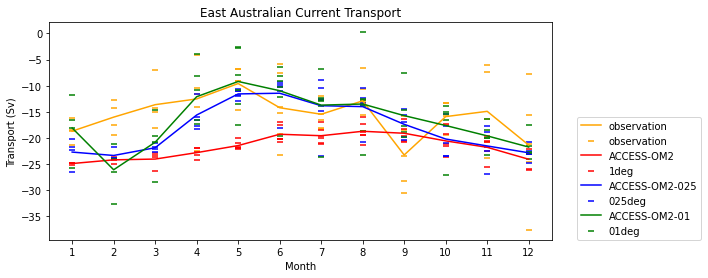

In [32]:
fig,ax = plt.subplots(figsize=(9,4))

a.plot(color = 'orange',label = 'observation')
plt.scatter([4,5,6,7,8,9,10,11,12], a1, color = 'orange', label = 'observation', marker = '_')
plt.scatter([1,2,3,4,5,6,7,8], a2, color = 'orange', marker = '_')
plt.scatter([5,6,7,8,9,10,11,12], a3, color = 'orange', marker = '_')
plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], a4, color = 'orange', marker = '_')
plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], a5, color = 'orange', marker = '_')
plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], a6, color = 'orange', marker = '_')


for i, ekey in enumerate(data.keys()):
    # if 0 <= i and i <= 2:   
    if 3 <= i and i <= 5:
    # if 6 <= i and i <= 8:
        
        print(ekey)
        e = data[ekey]

        A[i].plot(color = c[i], label=e['desc'])
        
        plt.scatter([4,5,6,7,8,9,10,11,12], A1[i], color = c[i], label = d[i], marker = '_')
        plt.scatter([1,2,3,4,5,6,7,8], A2[i], color = c[i], marker = '_')
        plt.scatter([5,6,7,8,9,10,11,12], A3[i], color = c[i], marker = '_')
        plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], A4[i], color = c[i], marker = '_')
        plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], A5[i], color = c[i], marker = '_')
        plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], A6[i], color = c[i], marker = '_')

        
        ax.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
        # ax.legend(loc = 1)
        # ax.set_ylim([-30, 0])
        ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
        ax.set_title(str('East Australian Current') + ' Transport')
        ax.set_xlabel('Month')
        ax.set_ylabel('Transport (Sv)')

        savefigure('transport_month_' + 'cycle2')     # set cycle

### for the model only

In [73]:
tstart1 = pd.to_datetime('1958/01/01')
tend1 = pd.to_datetime('2019/01/01')

#load transport data 
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
                                                
            
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                        start_time = str(tstart1),
                                        end_time = str(tend1)).sel(time=slice(tstart1,tend1))
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                        start_time = str(tstart1),
                                        end_time = str(tend1)).sel(time=slice(tstart1,tend1))
    

        

    e['tx_trans_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000))
    e['ty_trans_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000))
        

    e['tx_trans_int_2000'] = e['tx_trans_2000'].sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans_2000'].sum('st_ocean')

    
# calculate mass transport timeseries (kg/s)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['transport'] = dict()
    e['transport_mean_0-2000m'] = dict()
    
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == 'East Australian Current':
            
            if xmin == xmax:
                e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                    .sel(yt_ocean=slice(ymin, ymax))\
                                    .sum('yt_ocean')
            elif ymin == ymax:
                e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                    .sel(xt_ocean=slice(xmin, xmax))\
                                    .sum('xt_ocean')
            else:
                raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
        
        e['transport_mean_0-2000m'][strait] = e['transport'][strait]
            #.resample(time='A').mean('time')

            
(data['1deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).to_netcdf('A1.nc')
(data['025deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).to_netcdf('A2.nc') 
(data['01deg_c2']['transport_mean_0-2000m']['East Australian Current']/1e6/1036).to_netcdf('A3.nc') 

1deg_c1
025deg_c1
01deg_c1
1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3
1deg_c1
East Australian Current -21.74635193822394 Sv
025deg_c1
East Australian Current -18.407665173745176 Sv
01deg_c1
East Australian Current -17.39473742084942 Sv
1deg_c2
East Australian Current -22.051248926640927 Sv
025deg_c2
East Australian Current -18.462666625482626 Sv
01deg_c2
East Australian Current -16.644341127413128 Sv
1deg_c3
East Australian Current -20.66656172972973 Sv
025deg_c3
East Australian Current -17.248040525096524 Sv
01deg_c3
East Australian Current -16.907728555984555 Sv


In [6]:
A1 = xr.open_dataarray('A1.nc')
AA1 = A1.groupby('time.month').mean('time')

A2 = xr.open_dataarray('A2.nc')
AA2 = A2.groupby('time.month').mean('time')

A3 = xr.open_dataarray('A3.nc')
AA3 = A3.groupby('time.month').mean('time')

A = [AA1,AA2,AA3,AA1,AA2,AA3]

1deg_c2
025deg_c2
01deg_c2


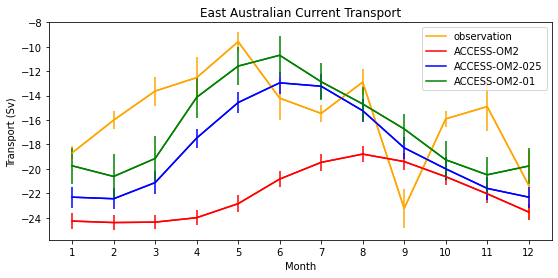

In [9]:
fig,ax = plt.subplots(figsize=(9,4))

c = ['r', 'b' , 'g', 'r', 'b' , 'g']

trans_obs = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_without gap.nc')
a = trans_obs.groupby('TIME.month').mean('TIME')
a.plot(color = 'orange',label = 'observation')

x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.errorbar(x, a, yerr = STD_b,color = 'orange')

for i, ekey in enumerate(data.keys()):
    if 3 <= i and i <= 5:
        
        print(ekey)
        e = data[ekey]

        A[i].plot(color = c[i], label=e['desc'])
        plt.errorbar(x,A[i],yerr = STD_A[i],color = c[i])
        # ax.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
        ax.legend(loc = 1)
        # ax.set_ylim([-30, 0])
        ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
        ax.set_title(str('East Australian Current') + ' Transport')
        ax.set_xlabel('Month')
        ax.set_ylabel('Transport (Sv)')

        savefigure('Transport_month_' + 'cycle2')     # set cycle

In [7]:
trans_obs = xr.open_dataarray('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_without gap.nc')
STD_b = []
b = trans_obs.groupby('TIME.month')
for i in range(1,13):
    m = b[i].mean('TIME')
    m2 = (b[i]**2).mean('TIME')
    STD = (m2 - m**(2.0))**(0.5)
    STD1 = STD/sqrt(12)
    STD_b.append(STD1.values.tolist())

In [8]:
STD_A1 = []
b = A1.groupby('time.month')
for i in range(1,13):
    m = b[i].mean('time')
    m2 = (b[i]**2).mean('time')
    STD = (m2 - m**(2.0))**(0.5)
    STD1 = STD/sqrt(12)
    STD_A1.append(STD1.values.tolist())
STD_A2 = []
b = A2.groupby('time.month')
for i in range(1,13):
    m = b[i].mean('time')
    m2 = (b[i]**2).mean('time')
    STD = (m2 - m**(2.0))**(0.5)
    STD1 = STD/sqrt(12)
    STD_A2.append(STD1.values.tolist())
STD_A3 = []
b = A3.groupby('time.month')
for i in range(1,13):
    m = b[i].mean('time')
    m2 = (b[i]**2).mean('time')
    STD = (m2 - m**(2.0))**(0.5)
    STD1 = STD/sqrt(12)
    STD_A3.append(STD1.values.tolist())
    
STD_A = [STD_A1, STD_A2, STD_A3,STD_A1, STD_A2, STD_A3]